# Overview


In [2]:
import numpy as np
import  pandas as pd
from  utilityFunctions import overallStats as utils
import utilityFunctions.columncleaner as cleaning_utils
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_feather("./data/imported_and_cleaned.feather")
df.head()

Gender_Student Lang_Spoken_Home                                  Books_Home  \
0           Girl        Sometimes  Enough to fill one bookcase (26–100 books)   
1           Girl        Sometimes  Enough to fill one bookcase (26–100 books)   
2           Girl    Almost always  Enough to fill one bookcase (26–100 books)   
3           Girl           Always               None or very few (0–10 books)   
4        <Other>    Almost always  Enough to fill one bookcase (26–100 books)   

  Own_Computer Shared_Computer Smartphone Internet_Access Study_Desk Own_Room  \
0          Yes             Yes        Yes             Yes        Yes      Yes   
1          Yes             Yes        Yes             Yes        Yes      Yes   
2          Yes              No        Yes             Yes        Yes      Yes   
3          Yes             Yes        Yes             Yes        Yes      Yes   
4          Yes             Yes        Yes             Yes        Yes      Yes   

                           ParentA_Edu_Level  ...  \
0                               I don’t know  ...   
1                               I don’t know  ...   
2                               I don’t know  ...   
3  <Lower secondary education—ISCED Level 2>  ...   
4  <Upper secondary education—ISCED Level 3>  ...   

  Disorderly_Behavior_during_Math_Lessons  Students_Confident_in_Mathematics  \
0                            Some Lessons       Not Confident in Mathematics   
1                            Some Lessons  Somewhat Confident in Mathematics   
2                            Some Lessons       Not Confident in Mathematics   
3                            Some Lessons       Not Confident in Mathematics   
4                            Some Lessons       Not Confident in Mathematics   

   Students_Value_Mathematics   Students_Like_Learning_Science  \
0  Somewhat Value Mathematics  Very Much Like Learning Science   
1    Do Not Value Mathematics  Very Much Like Learning Science   
2  Somewhat Value Mathematics  Very Much Like Learning Science   
3  Somewhat Value Mathematics  Very Much Like Learning Science   
4  Somewhat Value Mathematics  Very Much Like Learning Science   

   Instructional_Clarity_in_Science_Lessons  Students_Confident_in_Science  \
0               High Clarity of Instruction  Somewhat Confident in Science   
1               High Clarity of Instruction      Very Confident in Science   
2               High Clarity of Instruction  Somewhat Confident in Science   
3               High Clarity of Instruction      Very Confident in Science   
4               High Clarity of Instruction      Very Confident in Science   

   Students_Value_Science       Digital_Self_Efficacy  \
0  Strongly Value Science  High Digital Self-Efficacy   
1  Somewhat Value Science  High Digital Self-Efficacy   
2  Strongly Value Science  High Digital Self-Efficacy   
3  Strongly Value Science  High Digital Self-Efficacy   
4  Strongly Value Science  High Digital Self-Efficacy   

   Disorderly_Behavior_during_Science_Lessons  \
0                                Some Lessons   
1                           Few or No Lessons   
2                                Some Lessons   
3                           Few or No Lessons   
4                           Few or No Lessons   

   Students_Value_Environmental_Preservation  
0                             Strongly Value  
1                             Strongly Value  
2                        Very Strongly Value  
3                             Strongly Value  
4                        Very Strongly Value  

[5 rows x 58 columns]


## 2.1 Information on the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 5089
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Gender_Student                                3875 non-null   category
 1   Lang_Spoken_Home                              3875 non-null   category
 2   Books_Home                                    3875 non-null   category
 3   Own_Computer                                  3875 non-null   category
 4   Shared_Computer                               3875 non-null   category
 5   Smartphone                                    3875 non-null   category
 6   Internet_Access                               3875 non-null   category
 7   Study_Desk                                    3875 non-null   category
 8   Own_Room                                      3875 non-null   category
 9   ParentA_Edu_Level                             3875 non-nu

## Description of Scale Variables

In [5]:
scale = df.select_dtypes(include=['float64'])
scale.describe()

1ST_PV_MATHEMATICS  2ND_PV_MATHEMATICS  3RD_PV_MATHEMATICS  \
count         3875.000000         3875.000000         3875.000000   
mean           535.799511          537.114662          537.010392   
std             71.233248           72.853043           72.784336   
min            277.284500          253.506600          275.753990   
25%            487.232650          490.574675          487.940885   
50%            539.437640          540.276660          540.907620   
75%            585.311035          587.048795          587.434925   
max            760.064260          755.900090          786.846030   

       4TH_PV_MATHEMATICS  5TH_PV_MATHEMATICS  1ST_PV_SCIENCE  2ND_PV_SCIENCE  \
count         3875.000000         3875.000000     3875.000000     3875.000000   
mean           536.973786          537.487854      545.206092      544.376989   
std             72.328678           72.388332       77.334724       77.871636   
min            276.135970          285.025620      244.643900      227.475680   
25%            490.117620          490.422740      493.037685      494.455380   
50%            540.137650          541.004020      548.824690      546.115010   
75%            586.018585          586.923580      598.659730      598.581990   
max            763.670550          768.400850      774.870490      792.583400   

       3RD_PV_SCIENCE  4TH_PV_SCIENCE  5TH_PV_SCIENCE  ...  1ST_PV_PHYSICS  \
count     3875.000000     3875.000000     3875.000000  ...     3875.000000   
mean       546.444162      544.139611      544.195186  ...      541.283019   
std         76.905425       79.142504       77.284233  ...       82.859139   
min        260.325520      285.932770      254.227480  ...      170.700710   
25%        495.246335      492.137635      494.670760  ...      487.654470   
50%        550.099960      546.329420      545.974040  ...      542.868100   
75%        599.770580      599.574635      596.824690  ...      598.413650   
max        854.079880      781.217900      772.777110  ...      809.859440   

       2ND_PV PHYSICS  3RD_PV_PHYSICS  4TH_PV_PHYSICS  5TH_PV_PHYSICS  \
count     3875.000000     3875.000000     3875.000000     3875.000000   
mean       539.495403      538.945232      541.415666      540.956961   
std         81.806216       83.682377       82.906344       82.714247   
min        185.838310      243.616350      216.242340      208.810100   
25%        487.645265      483.618645      485.229305      485.597770   
50%        542.248430      541.824490      542.680080      543.467830   
75%        595.813615      596.514510      597.681080      597.729250   
max        830.102190      823.285610      801.222220      811.223590   

       1ST_PV_EARTH_SCIENCE  2ND_PV_EARTH_SCIENCE  3RD_PV_EARTH_SCIENCE  \
count           3875.000000           3875.000000           3875.000000   
mean             554.733544            554.150265            556.414688   
std               80.345028             80.040187             77.334702   
min              206.490430            235.014930            290.635780   
25%              504.204730            504.454930            506.405335   
50%              558.103000            556.910010            557.727870   
75%              610.900500            608.424310            610.303900   
max              807.443020            796.283400            813.307410   

       4TH_PV_EARTH_SCIENCE  5TH_PV_EARTH_SCIENCE  
count           3875.000000           3875.000000  
mean             553.140120            554.238566  
std               79.803988             80.013394  
min              210.880330            242.684300  
25%              501.506800            502.268485  
50%              556.062740            556.815740  
75%              607.686110            608.302775  
max              811.250690            811.481830  

[8 rows x 30 columns]

## 2.2 Description of the Caregorical Attributes (Columns)

In [6]:
categorical = df.select_dtypes(include=['category'])
categorical.describe()


Gender_Student Lang_Spoken_Home  \
count            3875             3875   
unique              3                4   
top               Boy           Always   
freq             1922             3051   

                                        Books_Home Own_Computer  \
count                                         3875         3875   
unique                                           5            2   
top     Enough to fill one bookcase (26–100 books)          Yes   
freq                                          1173         3138   

       Shared_Computer Smartphone Internet_Access Study_Desk Own_Room  \
count             3875       3875            3875       3875     3875   
unique               2          2               2          2        2   
top                Yes        Yes             Yes        Yes      Yes   
freq              2702       3839            3855       3530     3319   

       ParentA_Edu_Level  ... Disorderly_Behavior_during_Math_Lessons  \
count               3875  ...                                    3875   
unique                 9  ...                                       3   
top         I don’t know  ...                            Some Lessons   
freq                1328  ...                                    2059   

       Students_Confident_in_Mathematics  Students_Value_Mathematics  \
count                               3875                        3875   
unique                                 3                           3   
top         Not Confident in Mathematics  Somewhat Value Mathematics   
freq                                1910                        1792   

        Students_Like_Learning_Science  \
count                             3875   
unique                               3   
top     Somewhat Like Learning Science   
freq                              1473   

       Instructional_Clarity_in_Science_Lessons Students_Confident_in_Science  \
count                                      3875                          3875   
unique                                        3                             3   
top                 High Clarity of Instruction      Not Confident in Science   
freq                                       1733                          1657   

       Students_Value_Science       Digital_Self_Efficacy  \
count                    3875                        3875   
unique                      3                           3   
top      Do Not Value Science  High Digital Self-Efficacy   
freq                     1493                        2942   

       Disorderly_Behavior_during_Science_Lessons  \
count                                        3875   
unique                                          3   
top                                  Some Lessons   
freq                                         2004   

       Students_Value_Environmental_Preservation  
count                                       3875  
unique                                         3  
top                          Very Strongly Value  
freq                                        1759  

[4 rows x 28 columns]

## 2.3 Variables related to Parents

In [7]:
parents_columns = utils.getrelatedFields(df, 'Parent')
parents_columns.describe()


ParentA_Edu_Level ParentB_Edu_Level ParentA_Born_Country  \
count               3875              3875                 3875   
unique                 9                 9                    4   
top         I don’t know      I don’t know                  Yes   
freq                1328              1366                 2803   

       ParentB_Born_Country  
count                  3875  
unique                    4  
top                     Yes  
freq                   2784

## 2.4 Variables related to Confidence

In [8]:
confidence_colums   = utils.getrelatedFields(df, 'Confident')
confidence_colums.describe()

Students_Confident_in_Mathematics Students_Confident_in_Science
count                               3875                          3875
unique                                 3                             3
top         Not Confident in Mathematics      Not Confident in Science
freq                                1910                          1657

## 2.5 Variables related to Bullying

In [9]:
bullying_columns = utils.getrelatedFields(df, 'Bully')
bullying_columns.describe()

Student_Bullying
count                    3875
unique                      3
top     Never or Almost Never
freq                     2623

## 2.6 Variables related to Mathematics

In [10]:
maths_columns = utils.getrelatedFields(df, 'Math')
maths_columns.describe()

Students_Like_Learning_Mathematics  \
count                                3875   
unique                                  3   
top      Do Not Like Learning Mathematics   
freq                                 2219   

       Instructional_Clarity_in_Mathematics_Lessons  \
count                                          3875   
unique                                            3   
top                     High Clarity of Instruction   
freq                                           1652   

       Disorderly_Behavior_during_Math_Lessons  \
count                                     3875   
unique                                       3   
top                               Some Lessons   
freq                                      2059   

       Students_Confident_in_Mathematics  Students_Value_Mathematics  
count                               3875                        3875  
unique                                 3                           3  
top         Not Confident in Mathematics  Somewhat Value Mathematics  
freq                                1910                        1792

## 2,7 Variables related to Science

In [11]:
science_columns = utils.getrelatedFields(df, 'Science')
science_columns.describe()

Students_Like_Learning_Science  \
count                             3875   
unique                               3   
top     Somewhat Like Learning Science   
freq                              1473   

       Instructional_Clarity_in_Science_Lessons Students_Confident_in_Science  \
count                                      3875                          3875   
unique                                        3                             3   
top                 High Clarity of Instruction      Not Confident in Science   
freq                                       1733                          1657   

       Students_Value_Science Disorderly_Behavior_during_Science_Lessons  
count                    3875                                       3875  
unique                      3                                          3  
top      Do Not Value Science                               Some Lessons  
freq                     1493                                       2004

## 2.8 Variables related to Clarity

In [12]:
clarity_columns = utils.getrelatedFields(df, 'Clarity')
clarity_columns.describe()

Instructional_Clarity_in_Mathematics_Lessons  \
count                                          3875   
unique                                            3   
top                     High Clarity of Instruction   
freq                                           1652   

       Instructional_Clarity_in_Science_Lessons  
count                                      3875  
unique                                        3  
top                 High Clarity of Instruction  
freq                                       1733

## 2.9 Variables related to dissorderly behaviour

In [13]:
dissorderly_columns = utils.getrelatedFields(df, 'Disord')
dissorderly_columns.describe()

Disorderly_Behavior_during_Math_Lessons  \
count                                     3875   
unique                                       3   
top                               Some Lessons   
freq                                      2059   

       Disorderly_Behavior_during_Science_Lessons  
count                                        3875  
unique                                          3  
top                                  Some Lessons  
freq                                         2004

## 2.10 Scores Overview

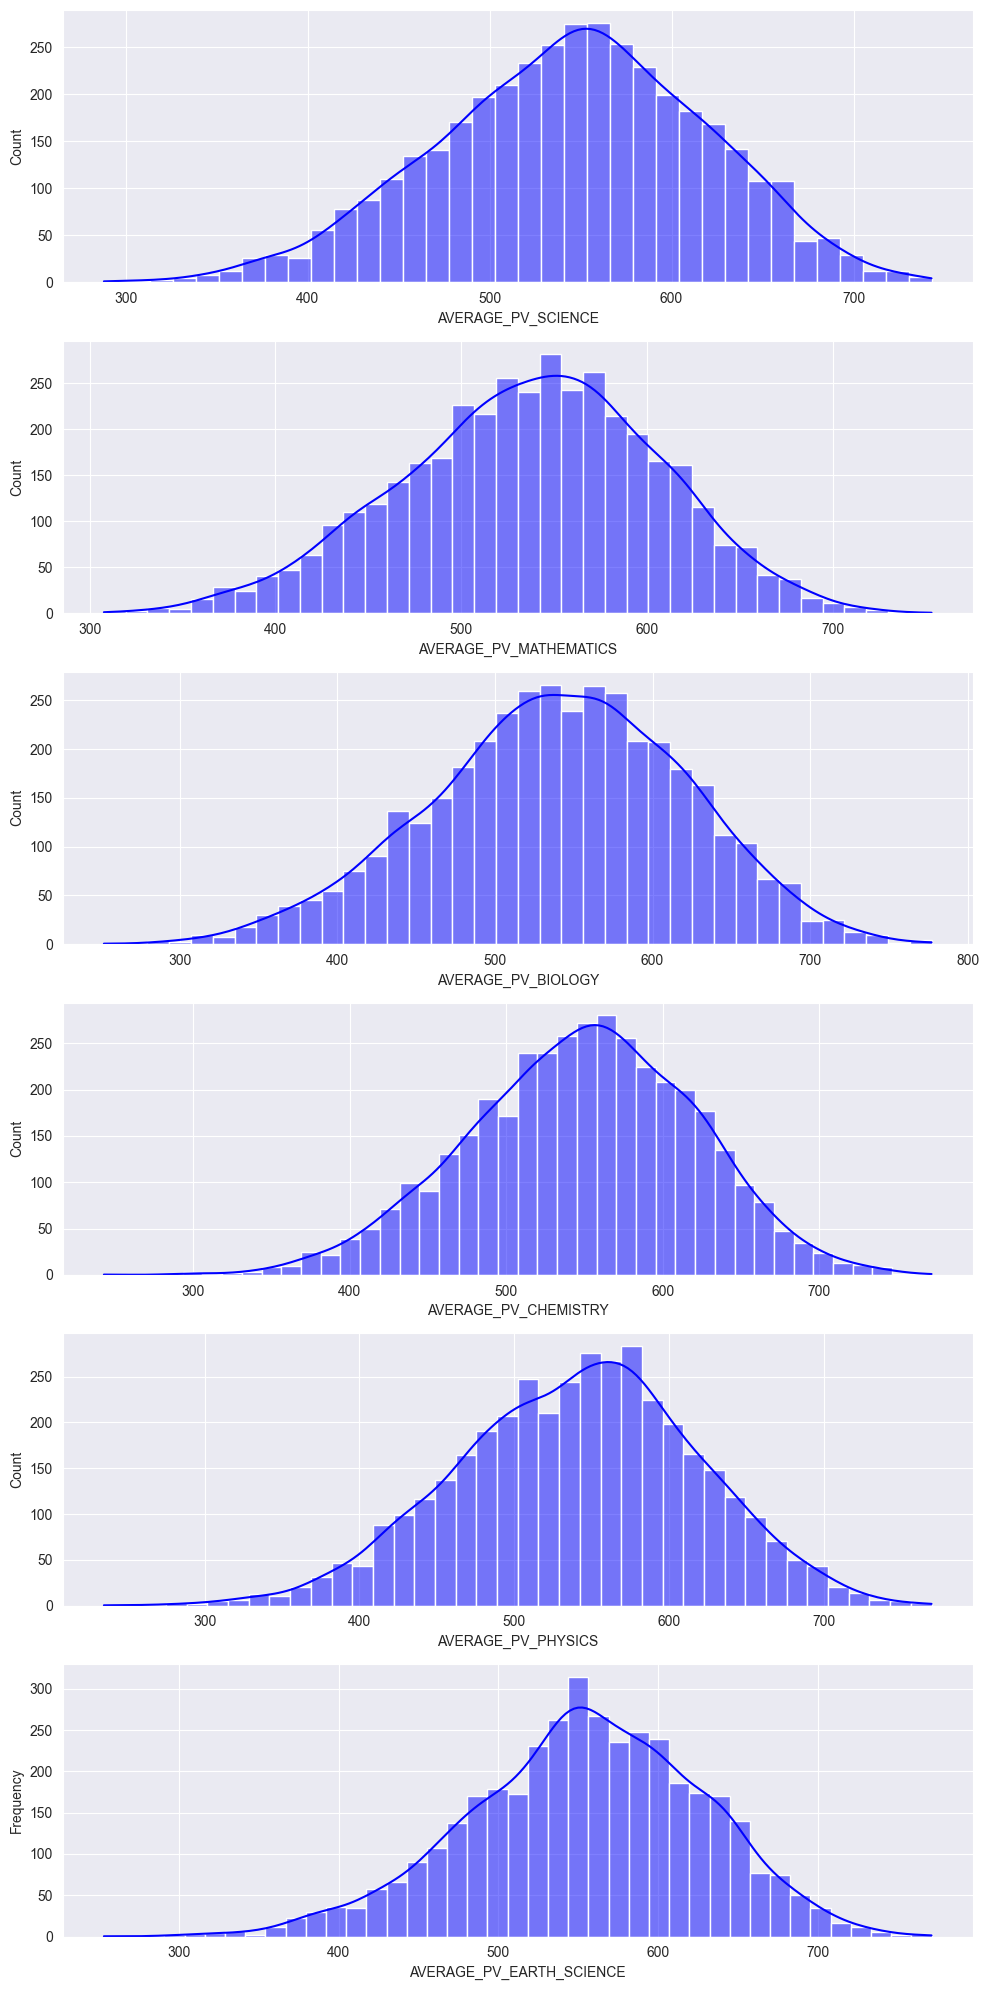

In [14]:
df_avgd = pd.read_feather("data/averaged.feather")

avg_mask = df_avgd.columns.str.contains('AVERAGE')
average_scores = df_avgd[df_avgd.columns[avg_mask]]
utils.OverallDistributionOfPVScores(df_avgd)

### 2.10.1 Mathematics Scores and Its distribution

AVERAGE_PV_MATHEMATICS
count             3875.000000
mean               536.877241
std                 69.298628
min                307.604440
25%                491.300436
50%                540.702408
75%                584.826807
max                753.278594

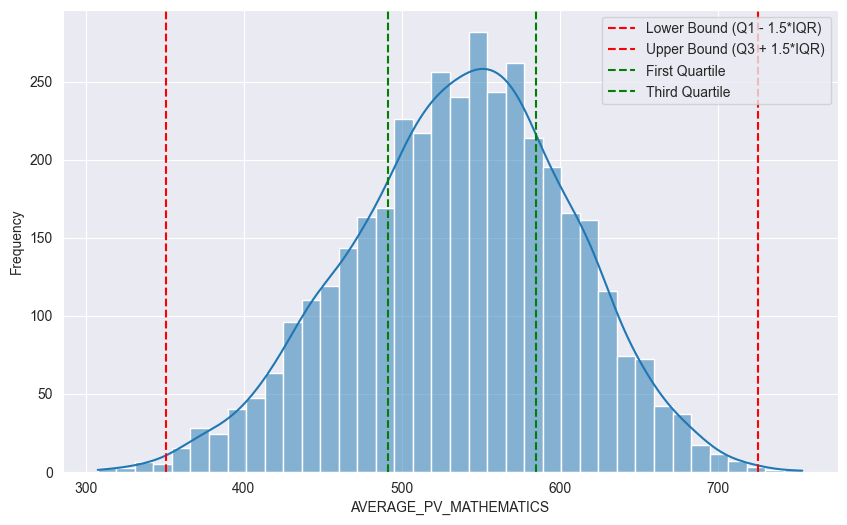

In [15]:
maths_pv = utils.getStatisticsAndDistribution(df_avgd, "MATHEMATICS")
maths_pv.describe()

#### 2.10.1.1 Outlier counts in Mathematics

In [16]:
iqr_count, outlier_count = utils.findNoInIQRandOutLierCount(df_avgd, "MATHEMATICS")
print(outlier_count)

17


### 2.10.2 Science Scores and Its distribution

AVERAGE_PV_SCIENCE
count         3875.000000
mean           544.872408
std             73.932875
min            288.093734
25%            495.768437
50%            548.235506
75%            596.960463
max            742.874860

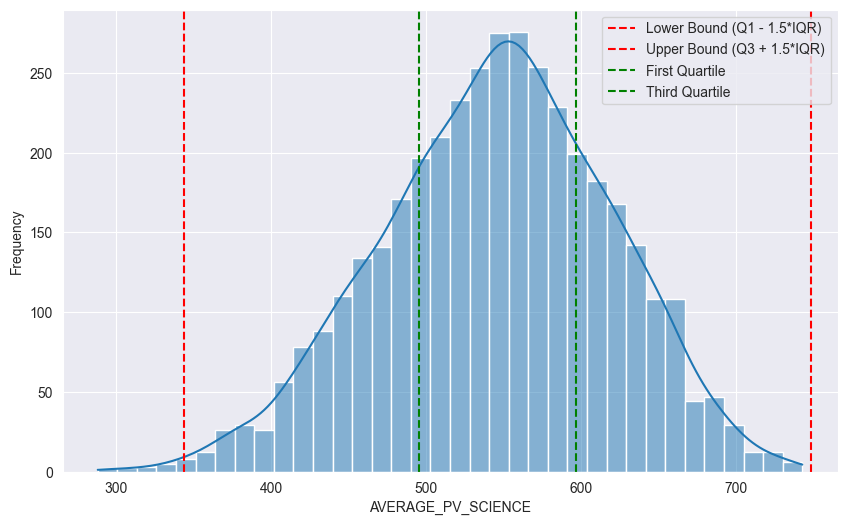

In [17]:
science_pv = utils.getStatisticsAndDistribution(df_avgd, "SCIENCE")
science_pv.describe()

#### 2.10.2.1 Outlier counts in Science

In [18]:
iqr_count, outlier_count = utils.findNoInIQRandOutLierCount(df_avgd, "SCIENCE")
print(outlier_count)

15


### 2.10.3 Biology Scores and Its distribution

AVERAGE_PV_BIOLOGY
count         3875.000000
mean           540.070319
std             80.923775
min            251.795736
25%            487.252077
50%            542.339920
75%            597.606655
max            777.098024

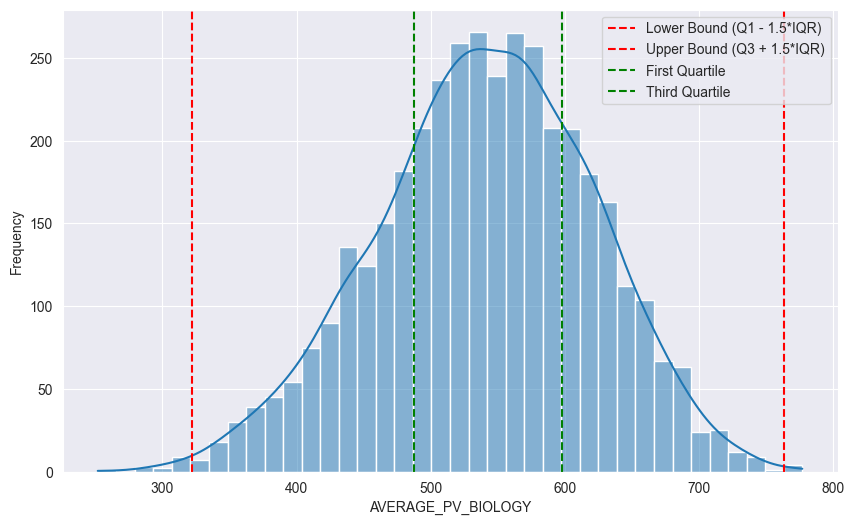

In [19]:
biology_pv = utils.getStatisticsAndDistribution(df_avgd, "BIOLOGY")
biology_pv.describe()


#### 2.10.3 Outlier Counts in Biology

In [20]:
iqr_count, outlier_count = utils.findNoInIQRandOutLierCount(df_avgd, "BIOLOGY")
print(outlier_count)

19


### 2.10.4 Chemistry Scores and Its distribution

AVERAGE_PV_CHEMISTRY
count           3875.000000
mean             548.347356
std               72.385135
min              242.952376
25%              500.028390
50%              551.556496
75%              599.410814
max              771.919460

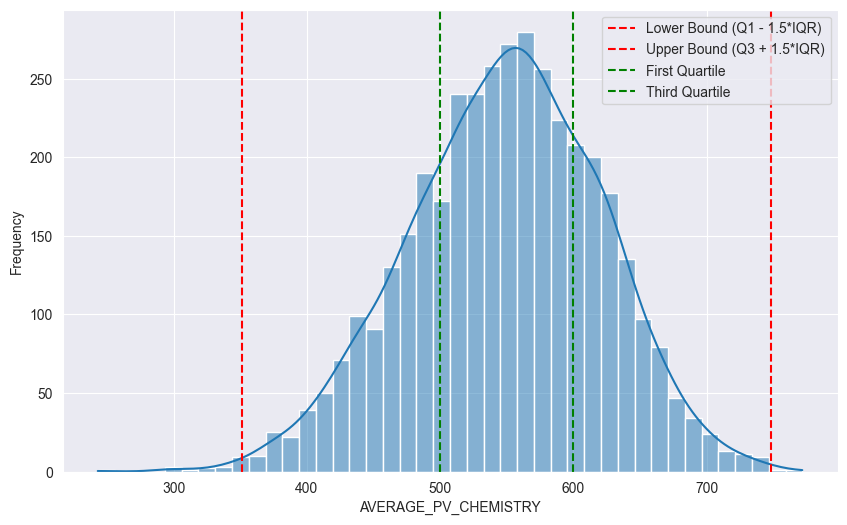

In [21]:
chemistry_pv = utils.getStatisticsAndDistribution(df_avgd, "CHEMISTRY")
chemistry_pv.describe()

#### 2.10.4.1 Outlier counts in Chemistry

In [22]:
iqr_count, outlier_count = utils.findNoInIQRandOutLierCount(df_avgd, "CHEMISTRY")
print(outlier_count)

18


### 2.10.5 Physics Scores and Its distribution

AVERAGE_PV_PHYSICS
count         3875.000000
mean           540.650220
std             78.033300
min            235.032310
25%            487.821962
50%            544.441400
75%            593.932069
max            769.432535

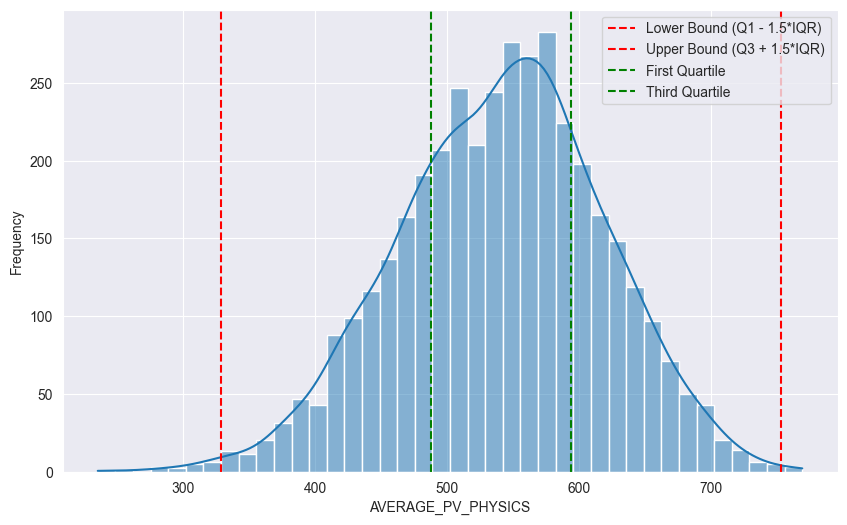

In [23]:
physics_pv = utils.getStatisticsAndDistribution(df_avgd, "PHYSICS")
physics_pv.describe()

#### 2.10.5.1 Outlier counts in Physics

In [24]:
iqr_count, outlier_count = utils.findNoInIQRandOutLierCount(df_avgd, "PHYSICS")
print(outlier_count)

23


### 2.10.6 Earth Science Scores and Its distribution

AVERAGE_PV_EARTH_SCIENCE
count               3875.000000
mean                 554.535437
std                   73.861355
min                  252.949742
25%                  506.380304
50%                  556.374880
75%                  605.697589
max                  771.381018

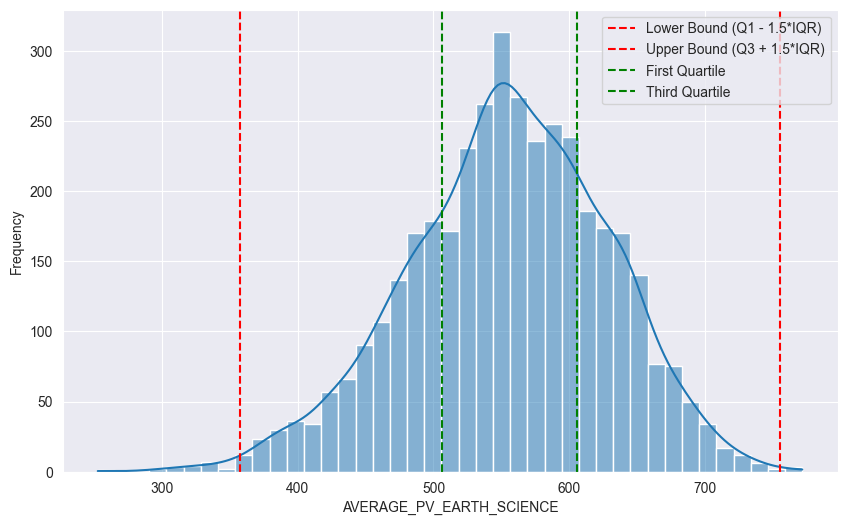

In [25]:
es_pv = utils.getStatisticsAndDistribution(df_avgd, "EARTH_SCIENCE")
es_pv.describe()


#### 2.10.6.1 Outlier counts in Earth Science

In [26]:
iqr_count, outlier_count = utils.findNoInIQRandOutLierCount(df_avgd, "EARTH_SCIENCE")
print(outlier_count)

27


## 2.11 Overview of Parental_Background

### 2.11.1  Educational Background

In [27]:
df_parental = pd.read_feather("./data/score_averaged_feather.feather")
df_edu_mask = df_parental.columns.str.contains('Edu_Level')
print(df_parental[df_parental.columns[df_edu_mask]].value_counts())

ParentA_Edu_Level                                                                                           ParentB_Edu_Level                                                     
I don’t know                                                                                                I don’t know                                                              1153
<Postgraduate degree: Master’s— ISCED Level 7 or Doctor—ISCED Level 8>                                      <Postgraduate degree: Master’s— ISCED Level 7 or Doctor—ISCED Level 8>     337
<Upper secondary education—ISCED Level 3>                                                                   <Upper secondary education—ISCED Level 3>                                  210
<Short-cycle tertiary education—ISCED Level 5>                                                              <Short-cycle tertiary education—ISCED Level 5>                             193
<Bachelor’s or equivalent level—ISCED Level 6>                           

In [28]:
df_parental = cleaning_utils.refillParentalEducation(df_parental)
df_parental.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 5089
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Gender_Student                                3875 non-null   category
 1   Lang_Spoken_Home                              3875 non-null   category
 2   Books_Home                                    3875 non-null   category
 3   Own_Computer                                  3875 non-null   category
 4   Shared_Computer                               3875 non-null   category
 5   Smartphone                                    3875 non-null   category
 6   Internet_Access                               3875 non-null   category
 7   Study_Desk                                    3875 non-null   category
 8   Own_Room                                      3875 non-null   category
 9   ParentA_Edu_Level                             3875 non-nu

In [29]:
print(df_parental[df_parental.columns[df_edu_mask]].value_counts())

ParentA_Edu_Level  ParentB_Edu_Level
Not Available      Not Available        1181
Tertiary           Tertiary              368
Postgraduate       Postgraduate          337
Upper Secondary    Upper Secondary       210
Tertiary           Upper Secondary       137
Undergraduate      Undergraduate         132
Tertiary           primary                96
Postgraduate       Tertiary               94
Upper Secondary    primary                90
Postgraduate       Undergraduate          88
primary            primary                84
Tertiary           Postgraduate           82
Undergraduate      Postgraduate           82
Postgraduate       Not Available          79
Upper Secondary    Tertiary               79
Undergraduate      Tertiary               78
Tertiary           Undergraduate          64
Postgraduate       Upper Secondary        58
Not Available      Postgraduate           56
Tertiary           Not Available          54
Postgraduate       primary                52
Not Available     

In [30]:
df_parental['ParentA_Edu_Level'] = df_parental['ParentA_Edu_Level'].apply(lambda x: "Postgraduate" if "Postgraduate" in str(x) else x)
df_parental['ParentA_Edu_Level'] = df_parental['ParentA_Edu_Level'].apply(lambda x: "Tertiary" if "Tertiary" in str(x) else x)
df_parental['ParentA_Edu_Level'] = df_parental['ParentA_Edu_Level'].apply(lambda x: "Undergraduate" if "Undergraduate" in str(x) else x)
df_parental['ParentA_Edu_Level'] = df_parental['ParentA_Edu_Level'].apply(lambda x: "Not Available" if "Not Available" in str(x) else x)
df_parental['ParentA_Edu_Level'] = df_parental['ParentA_Edu_Level'].apply(lambda x: "Upper Secondary" if "Upper Secondary" in str(x) else x)
df_parental['ParentA_Edu_Level'] = df_parental['ParentA_Edu_Level'].apply(lambda x: "Primary" if "primary" in str(x) else x)
print(df_parental["ParentA_Edu_Level"].value_counts())

ParentA_Edu_Level
Not Available      1352
Tertiary            801
Postgraduate        708
Upper Secondary     468
Undergraduate       389
Primary             157
Name: count, dtype: int64


In [31]:
df_parental["ParentB_Edu_Level"] = df_parental["ParentB_Edu_Level"].apply(lambda x: "Postgraduate" if "Postgraduate" in str(x) else x)
df_parental["ParentB_Edu_Level"] = df_parental["ParentB_Edu_Level"].apply(lambda x: "Tertiary" if "Tertiary" in str(x) else x)
df_parental["ParentB_Edu_Level"] = df_parental["ParentB_Edu_Level"].apply(lambda x: "Undergraduate" if "Undergraduate" in str(x) else x)
df_parental["ParentB_Edu_Level"] = df_parental["ParentB_Edu_Level"].apply(lambda x: "Not Available" if "Not Available" in str(x) else x)
df_parental["ParentB_Edu_Level"] = df_parental["ParentB_Edu_Level"].apply(lambda x: "Upper Secondary" if "Upper Secondary" in str(x) else x)
df_parental["ParentB_Edu_Level"] = df_parental["ParentB_Edu_Level"].apply(lambda x: "Primary" if "primary" in str(x) else x)
print(df_parental["ParentB_Edu_Level"].value_counts())

ParentB_Edu_Level
Not Available      1406
Tertiary            660
Postgraduate        589
Upper Secondary     490
Primary             399
Undergraduate       331
Name: count, dtype: int64


#### 2.11.1.1  Percentage of Masters holders (at least one parent)


In [32]:
education_available = df_parental.drop(
    df_parental[(df_parental['ParentA_Edu_Level'] == "Not Available") |
                (df_parental['ParentB_Edu_Level'] == "Not Available")].index
)


masters_holders_cond = education_available["ParentA_Edu_Level"].str.contains("Postgraduate") | education_available["ParentB_Edu_Level"].str.contains("Postgraduate")

ms_count = education_available[masters_holders_cond]["ParentA_Edu_Level"].count()
print(ms_count /education_available["ParentA_Edu_Level"].count() * 100)


35.900783289817234


#### 2.11.1.2  Percentage of Undergraduate or Masters holders (at least one parent)


In [33]:
higer_edu = education_available["ParentA_Edu_Level"].isin(["Postgraduate" ,"Undergraduate"]) | education_available["ParentB_Edu_Level"].isin(["Postgraduate" ,"Undergraduate"])


he_count = education_available[higer_edu]["ParentA_Edu_Level"].count()

print(he_count /education_available["ParentA_Edu_Level"].count() * 100)

51.56657963446475


#### 2.11.1.3  Percentage of Undergraduate  holders (at least one parent)


In [34]:
graduates = education_available["ParentA_Edu_Level"].str.contains("Undergraduate") | education_available["ParentB_Edu_Level"].str.contains("Undergraduate")

graduate_count = education_available[masters_holders_cond]["ParentA_Edu_Level"].count()
print(graduate_count /education_available["ParentA_Edu_Level"].count() * 100)

35.900783289817234


#### 2.11.1.4  Overall - Distribution


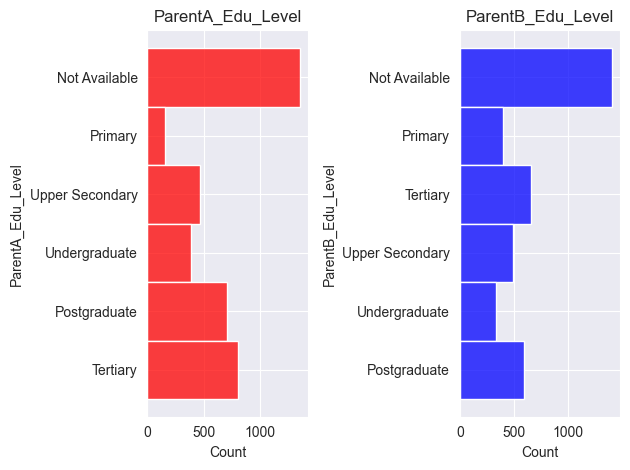

In [35]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data=df_parental, y="ParentA_Edu_Level", color="r",bins=6 , ax=axes[0])
axes[0].set_title("ParentA_Edu_Level")
axes[0].set_ylabel("ParentA_Edu_Level")
axes[0].set_xlabel("Count")
sns.histplot(data=df_parental, y="ParentB_Edu_Level", color="b",bins=6 , ax=axes[1])
axes[1].set_title("ParentB_Edu_Level")
axes[1].set_ylabel("ParentB_Edu_Level")
axes[1].set_xlabel("Count")
plt.tight_layout()

In [36]:
df_parental["ParentA_Edu_Level"] = pd.Categorical(
    df_parental["ParentA_Edu_Level"],
    categories=["Not Available", "Primary", "Upper Secondary", "Tertiary", "Undergraduate", "Postgraduate"],
    ordered=True
)

df_parental["ParentB_Edu_Level"] = pd.Categorical(
    df_parental["ParentB_Edu_Level"],
    categories=["Not Available", "Primary", "Upper Secondary", "Tertiary", "Undergraduate", "Postgraduate"],
    ordered=True
)


In [37]:
df_parental["highest"] = df_parental[["ParentA_Edu_Level", "ParentB_Edu_Level"]].max(axis=1)
print(df_parental["highest"])


0       Not Available
1       Not Available
2       Not Available
3             Primary
4            Tertiary
            ...      
5083     Postgraduate
5084     Postgraduate
5087     Postgraduate
5088    Not Available
5089     Postgraduate
Name: highest, Length: 3875, dtype: category
Categories (6, object): ['Not Available' < 'Primary' < 'Upper Secondary' < 'Tertiary' < 'Undergraduate' < 'Postgraduate']


Text(0.5, 1.0, 'Highest parental educational qualification')

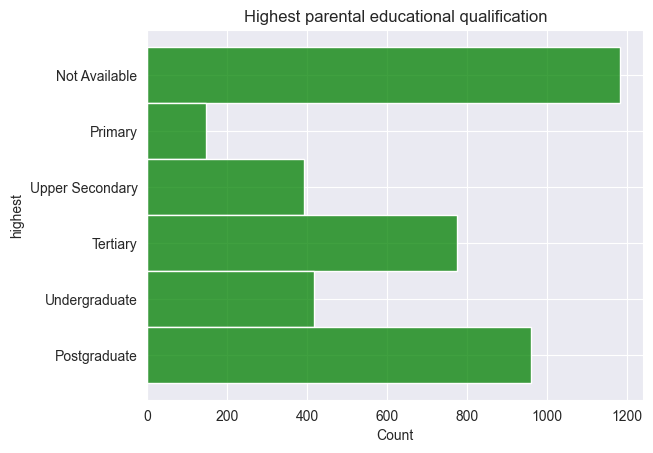

In [38]:
sns.histplot(data=df_parental, y="highest", color="g",bins=6 )
plt.title("Highest parental educational qualification")

In [39]:
df_parental.to_feather("./data/cleaned_parental_education.feather")

### 2.11.2  Ethnic Background

In [40]:
country_mask = df_parental.columns.str.contains("Born_Country")
print(df_parental.loc[: , country_mask].value_counts())

ParentA_Born_Country  ParentB_Born_Country
Yes                   Yes                     2501
No                    No                       771
Yes                   No                       288
No                    Yes                      277
Yes                   I don’t know               8
Not applicable        Not applicable             7
I don’t know          I don’t know               6
Yes                   Not applicable             6
No                    I don’t know               5
I don’t know          Yes                        3
Not applicable        Yes                        3
Name: count, dtype: int64


In [41]:

df_parental["ParentB_Born_Country"] = df_parental["ParentB_Born_Country"].apply(
    lambda x: "NA" if "Not applicable" in str(x) else x)
df_parental["ParentB_Born_Country"] = df_parental["ParentB_Born_Country"].apply(
    lambda x: "NA" if "I don’t know" in str(x) else x)
df_parental["ParentB_Born_Country"] = df_parental["ParentB_Born_Country"].apply(
    lambda x: "Native" if "Yes" in str(x) else x)
df_parental["ParentB_Born_Country"] = df_parental["ParentB_Born_Country"].apply(
    lambda x: "Foreign born" if "No" in str(x) else x)
print(df_parental["ParentB_Born_Country"].value_counts())

ParentB_Born_Country
Native          2784
Foreign born    1059
NA                32
Name: count, dtype: int64


In [42]:

df_parental["ParentA_Born_Country"] = df_parental["ParentA_Born_Country"].apply(
    lambda x: "NA" if "Not applicable" in str(x) else x)
df_parental["ParentA_Born_Country"] = df_parental["ParentA_Born_Country"].apply(
    lambda x: "NA" if "I don’t know" in str(x) else x)
df_parental["ParentA_Born_Country"] = df_parental["ParentA_Born_Country"].apply(
    lambda x: "Native" if "Yes" in str(x) else x)
df_parental["ParentA_Born_Country"] = df_parental["ParentA_Born_Country"].apply(
    lambda x: "Foreign born" if "No" in str(x) else x)
print(df_parental["ParentA_Born_Country"].value_counts())

ParentA_Born_Country
Native          2803
Foreign born    1053
NA                19
Name: count, dtype: int64


#### 2.11.2.1 Percentage of all native born

In [43]:
total_count =df_parental["ParentA_Born_Country"].count()
all_native_count = df_parental[df_parental["ParentA_Born_Country"].str.contains("Native") & df_parental["ParentB_Born_Country"].str.contains("Native") ]["ParentA_Born_Country"].count()

perc_all_native = all_native_count / total_count
print(perc_all_native * 100)

64.54193548387097


#### 2.11.2.2 Percentage of all foreign born

In [44]:
all_foreign_count = df_parental[df_parental["ParentA_Born_Country"].str.contains("Foreign") & df_parental["ParentB_Born_Country"].str.contains("Foreign") ]["ParentA_Born_Country"].count()




perc_all_foreign = all_foreign_count / total_count
print(perc_all_foreign * 100)

19.896774193548385


#### 2.11.2.2 Percentage of At least one foreign

In [45]:
at_least_foreign = df_parental[df_parental["ParentA_Born_Country"].str.contains("Foreign") | df_parental["ParentB_Born_Country"].str.contains("Foreign") ]["ParentA_Born_Country"].count()

perc_foreign_native = at_least_foreign / total_count
print(perc_foreign_native * 100)

34.60645161290323


#### 2.11.2.3 Overall Distribution

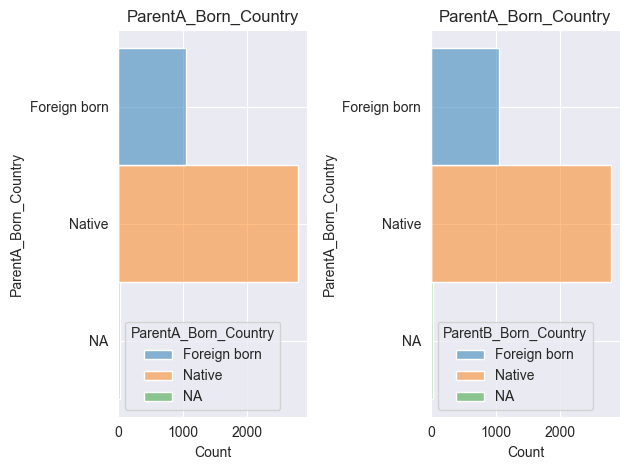

In [46]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data=df_parental, y="ParentA_Born_Country",hue="ParentA_Born_Country",bins=3 , ax=axes[0])
axes[0].set_title("ParentA_Born_Country")
axes[0].set_ylabel("ParentA_Born_Country")
axes[0].set_xlabel("Count")
sns.histplot(data=df_parental, y="ParentB_Born_Country", hue="ParentB_Born_Country" ,bins=3 , ax=axes[1])
axes[1].set_title("ParentA_Born_Country")
axes[1].set_ylabel("ParentA_Born_Country")
axes[1].set_xlabel("Count")
plt.tight_layout()

In [47]:
df_parental = cleaning_utils.originOfParents(df_parental)
print(df_parental["Parental_Origin"].value_counts())


Parental_Origin
All Native      2501
All Foreign      771
At least One     570
NA                33
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 5089
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Gender_Student                                3875 non-null   category
 1   Lang_Spoken_Home                              3875 non-null   category
 2   Books_Home                                    3875 non-null   category
 3   Own_Computer                                  3875 non-null   category
 4   Shared_Computer                               3875 non-null   category
 5   Smartphone                                    3875 non-null   category
 6   Internet_Access                               3875 non-null   category
 7   Study_Desk                                    3875 non-null   category
 8   Own_Room                                      3875 non-null   category
 9   ParentA_Edu_Level                             3875 non-nu

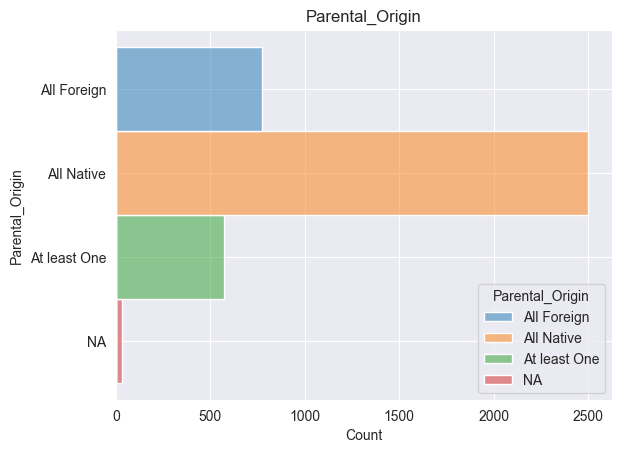

In [50]:
sns.histplot(data=df_parental, y="Parental_Origin",  hue="Parental_Origin" ,bins=3 )
plt.title("Parental_Origin")
df_parental.info()

In [51]:
df_parental.to_feather("./data/cleaned_parental_origin")